# TensorFlow Data Augmentation 

# <u>Authors:</u>
## 1. Matthias Bartolo ID: 0436103L
## 2. Luke Cardona ID: 0011803H
## 3. Jerome Agius ID: 0353803L
## 4. Isaac Muscat ID: 0265203L

## <u>Installed Packages</u>

In [1]:
#!pip install tensorflow 
#!pip install --upgrade tensorflow

## <u>Packages</u>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os 
import tensorflow as tf
%matplotlib inline
from IPython.display import Image
from PIL import Image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator
from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomCrop
from scipy.ndimage import gaussian_filter

## <u>Loading required images</u>

In [4]:
#Specifying the image directory
directory = "./images/original_images/"

#Function to load the .jpeg images in the specified directory
def loadImages(directory):
    #List to store the original images
    original_imgs = []
    
    #Retrieving the list of all file names
    files = os.listdir(directory);
    for file in files: 
        if(file[len(file)-4:len(file)] == "jpeg"):
            
            #Adding the image to the list of original images
            original_imgs.append(tf.keras.preprocessing.image.load_img(directory+file))
    
    #Returning the list of original images
    return original_imgs

#Retrieving the list of original images from the specified directory
original_imgs = loadImages(directory)

## <u>Data Augmentation Functions</u> 

**AlterImage** - This function executes the passed data augmentatiuon function on the passed image. The possible functions include:  

- Rotation()
- Brightness()
- HorizontalFlip()
- VerticalFlip()
- Shear()
- Translation()

In [5]:
def AlterImage(img, function):
    #Convert the image to a numpy array
    img_array = tf.keras.preprocessing.image.img_to_array(img)

    #Expand the dimensions of the image array to (1, height, width, channels)
    img_array = tf.expand_dims(img_array, 0)

    #Create an iterator for the data generator
    it = function[0].flow(img_array)

    #Get the first augmented image from the iterator
    augmented_img_array = it.next()[0]

    #Convert the augmented image array back to an image
    augmented_img = tf.keras.preprocessing.image.array_to_img(augmented_img_array)
    
    return augmented_img, function[1]

**Rotation** - This function is used in conjunction with the AlterImage function to rotate the image randomly within a set range. 

In [6]:
def Rotation():
    datagen = ImageDataGenerator(rotation_range=20)
    return datagen, "Rotation Image"

**Brightness** - This function is used in conjunction with the AlterImage function to adjusts the brightness of the image within a set range.

In [7]:
def Brightness():
    datagen = ImageDataGenerator(
        # Randomly adjust the brightness of the images by up to 30%
        brightness_range=(0.5, 3),
    )
    return datagen, "Brightness Image"

**Contrast** - This function adjusts the contrast of the passed image in between a certain range.

In [8]:
def Contrast(img):
    contrast_img = tf.image.random_contrast(img, 0, random.randint(1,10))
    return contrast_img, "Contrast Image"

**Saturation** - This function adjusts the saturation of the passed image between a certain range.

In [9]:
def Saturation(img):
    saturation_img = tf.image.adjust_saturation(img, random.randint(0,20))
    return saturation_img, "Saturation Image"

**Hue** - This function adjusts the hue of the passed image between a certain range.

In [10]:
def Hue(img):
    hue_img = tf.image.random_hue(img, random.uniform(0,0.5))
    return hue_img, "Hue Image"

**CenterCrop** - This function crops the center of the passed image and returns the cropped out section.

In [11]:
def CenterCrop(img):
    height, width = tf.shape(img)[0], tf.shape(img)[1]

    # Calculate the crop offset for the height and width dimensions
    offset_height = tf.cast((height - 400) / 2, tf.int32)
    offset_width = tf.cast((width - 400) / 2, tf.int32)

    # Crop the image using the calculated offsets and crop size
    centre_crop_img = tf.image.crop_to_bounding_box(img, offset_height, offset_width,400, 400)
    return centre_crop_img, "Center Crop Image"

**HorizontalFlip** - This function is used in conjunction with the AlterImage function to flip the image horizontally in relation to its center point.

In [12]:
def HorizontalFlip():
    # Create an instance of ImageDataGenerator with the desired transformations
    datagen = ImageDataGenerator(
        # Flip the images horizontally
        horizontal_flip=True,
    )
    return datagen, "Horizontal Flip Image"

**VerticalFlip** - This function is used in conjunction with the AlterImage function to flip the image vertically in relation to its center point.

In [13]:
def VerticalFlip():
    # Create an instance of ImageDataGenerator with the desired transformations
    datagen = ImageDataGenerator(
        # Flip the images vertically
        vertical_flip=True,
    )
    return datagen,"Vertical Flip Image"

**Shear** - This function is used in conjunction with the AlterImage function to shear the image wihtin a set range.

In [14]:
def Shear():
    # Create an instance of ImageDataGenerator with the desired transformations
    datagen = ImageDataGenerator(
        # Apply shear transformation to the images
        shear_range=50,
    )
    return datagen, "Shear Image"

**Gamma** - This function alters the gamma values of the passed image within a set range.

In [15]:
def Gamma(img):
    gamma_img = tf.image.adjust_gamma(img, random.uniform(0.5,2))
    return gamma_img, "Gamma Image"

**Translation** - This function is used in conjunction with the AlterImage function to translate the entire image along both axis within a set range. 

In [16]:
def Translation():
    datagen = ImageDataGenerator(
    # Randomly translate the images horizontally by up to 20% of the width
    width_shift_range=0.2,
    # Randomly translate the images vertically by up to 20% of the height
    height_shift_range=0.2,
    # Fill in any empty pixels with the nearest pixel value
    fill_mode='nearest')
    return datagen, "Translation Image"

**GaussianBlur** - This function applies the GaussianBlur kernal onto the passed image

In [17]:
def GaussianBlur(img):
    sigma = 3
    # Apply Gaussian blur
    gaussian_blur_img = gaussian_filter(img, sigma=sigma)
    # Convert back to image
    gaussian_blur_img = tf.keras.preprocessing.image.array_to_img(gaussian_blur_img)
    return gaussian_blur_img, "Gaussian Blur Image"

**AugmentImg** - This function is used to apply all the image augmentation functions discussed above on the passed image and return a list of augemented images. 

In [18]:
def AugmentImg(img):
    Augmented_Img = {"Rotation":[], "Brightness":[],"Contrast":[],"Saturation":[],
                     "Hue":[],"HorizontalFlip":[],"VerticalFlip":[],"Shear":[],
                    "CenterCrop":[],"Gamma":[],"GaussianBlur":[],"Translation": []}
    
    #Executing all augmentation function fives times per image and storing the results
    for x in range(5):
        Augmented_Img["Rotation"].append(AlterImage(img, Rotation()))
        Augmented_Img["Brightness"].append(AlterImage(img,Brightness()))
        Augmented_Img["Contrast"].append(Contrast(img))
        Augmented_Img["Saturation"].append(Saturation(img))
        Augmented_Img["Hue"].append(Hue(img))
        Augmented_Img["HorizontalFlip"].append(AlterImage(img,HorizontalFlip()))
        Augmented_Img["VerticalFlip"].append(AlterImage(img,VerticalFlip()))
        Augmented_Img["Shear"].append(AlterImage(img,Shear()))
        Augmented_Img["CenterCrop"].append(CenterCrop(img))
        Augmented_Img["Gamma"].append(Gamma(img))
        Augmented_Img["GaussianBlur"].append(GaussianBlur(img))
        Augmented_Img["Translation"].append(AlterImage(img,Translation()))
    return Augmented_Img

In [19]:
AugmentedImgs = []

for img in original_imgs: 
    AugmentedImgs.append(AugmentImg(img))

# <u>Output Display</u>

This method displays all the altered images in an ordarly manner for presentation purposes.

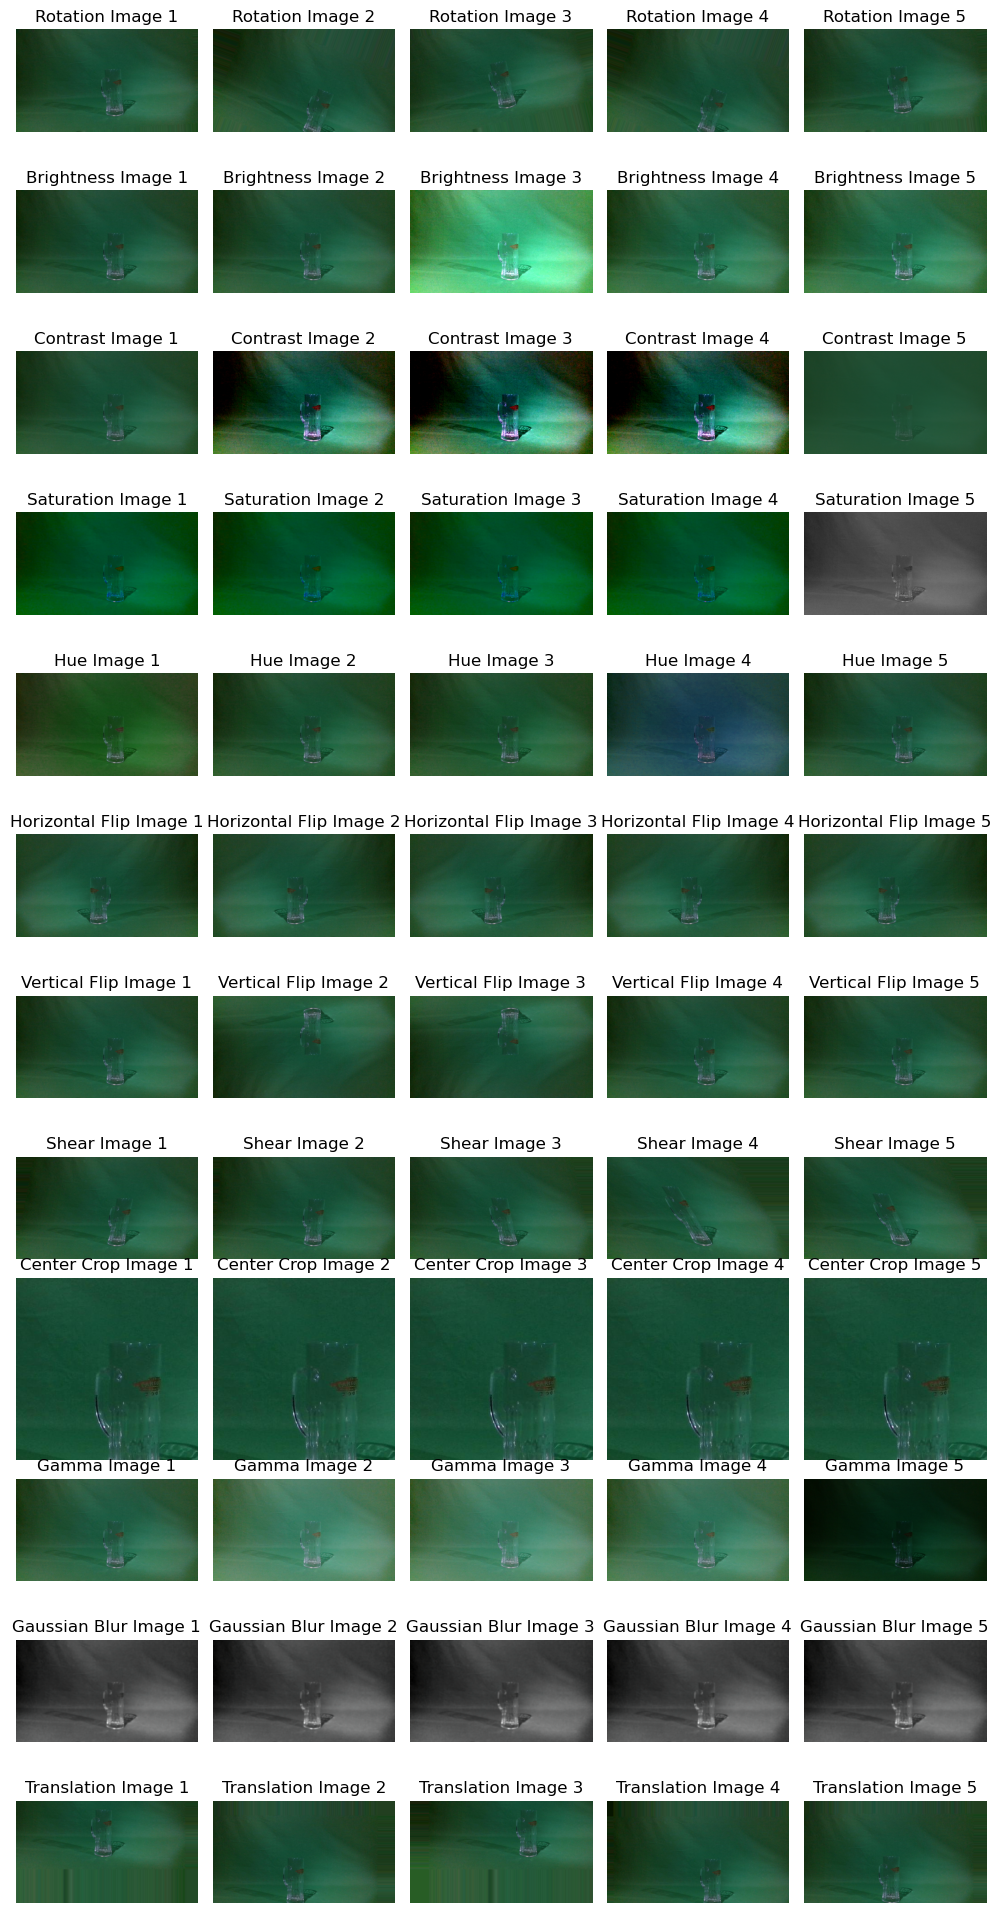

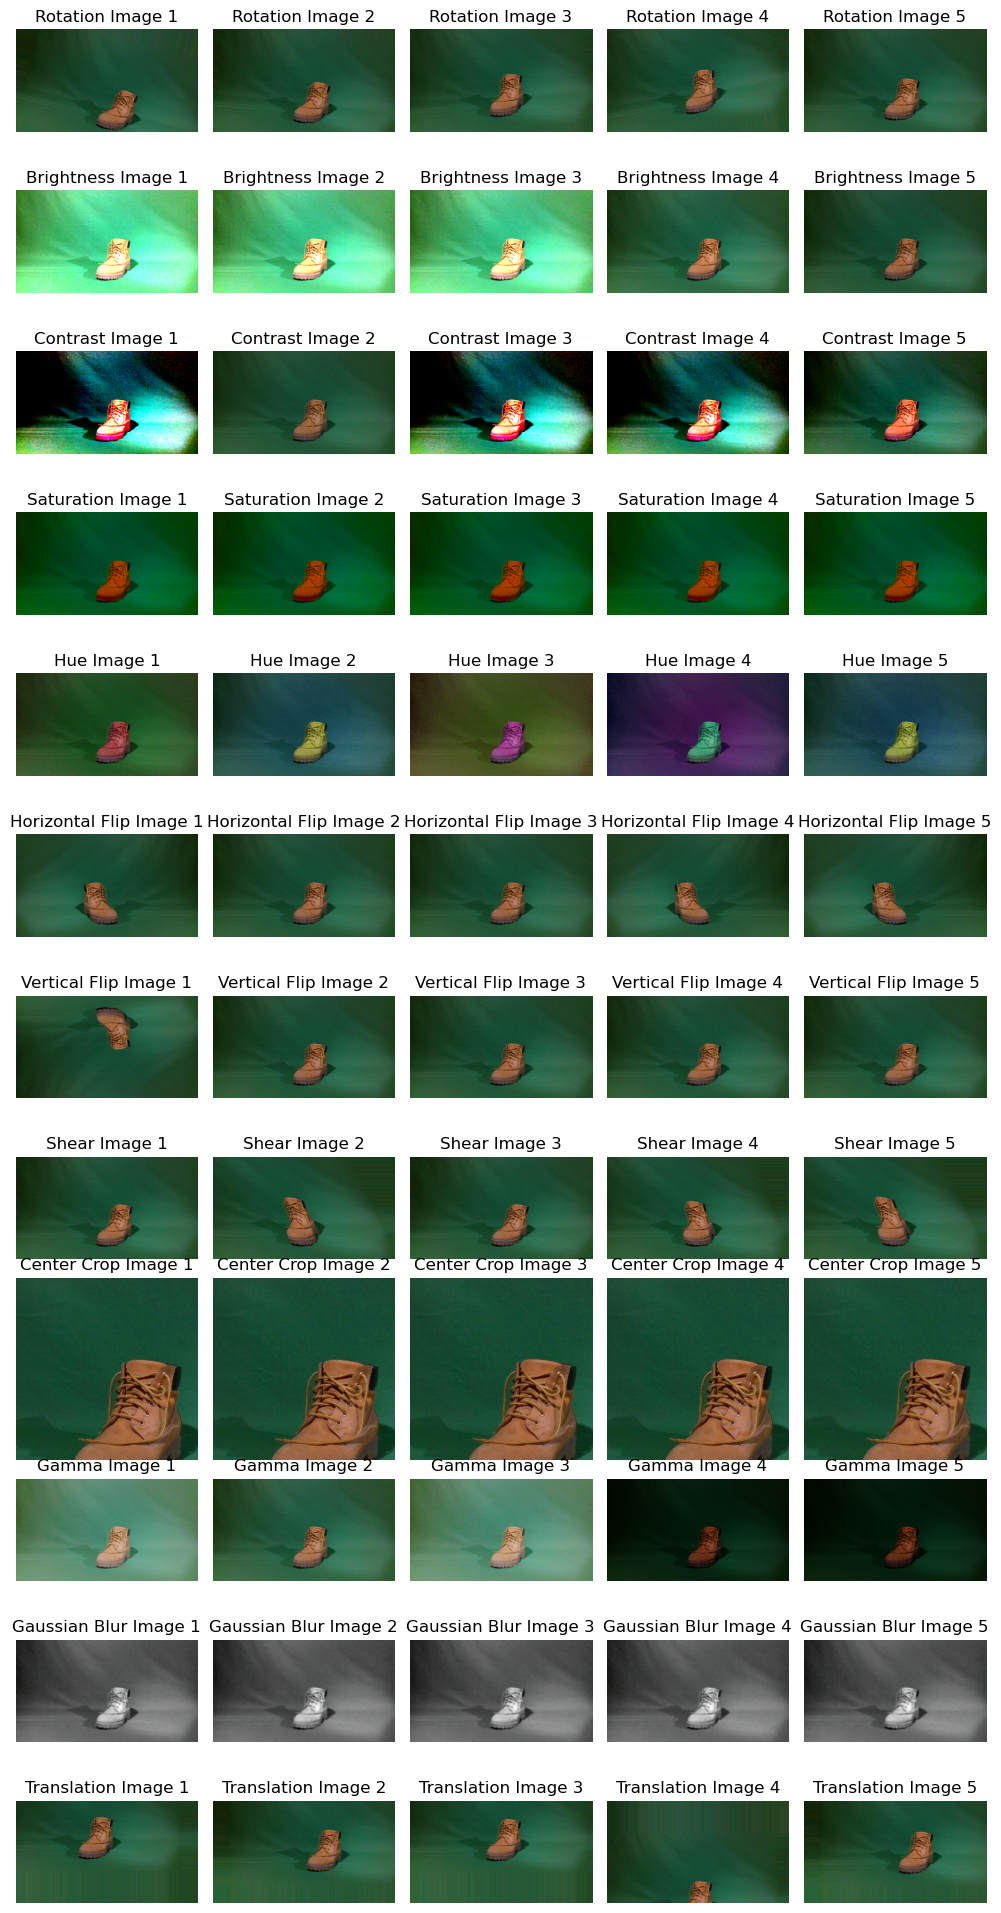

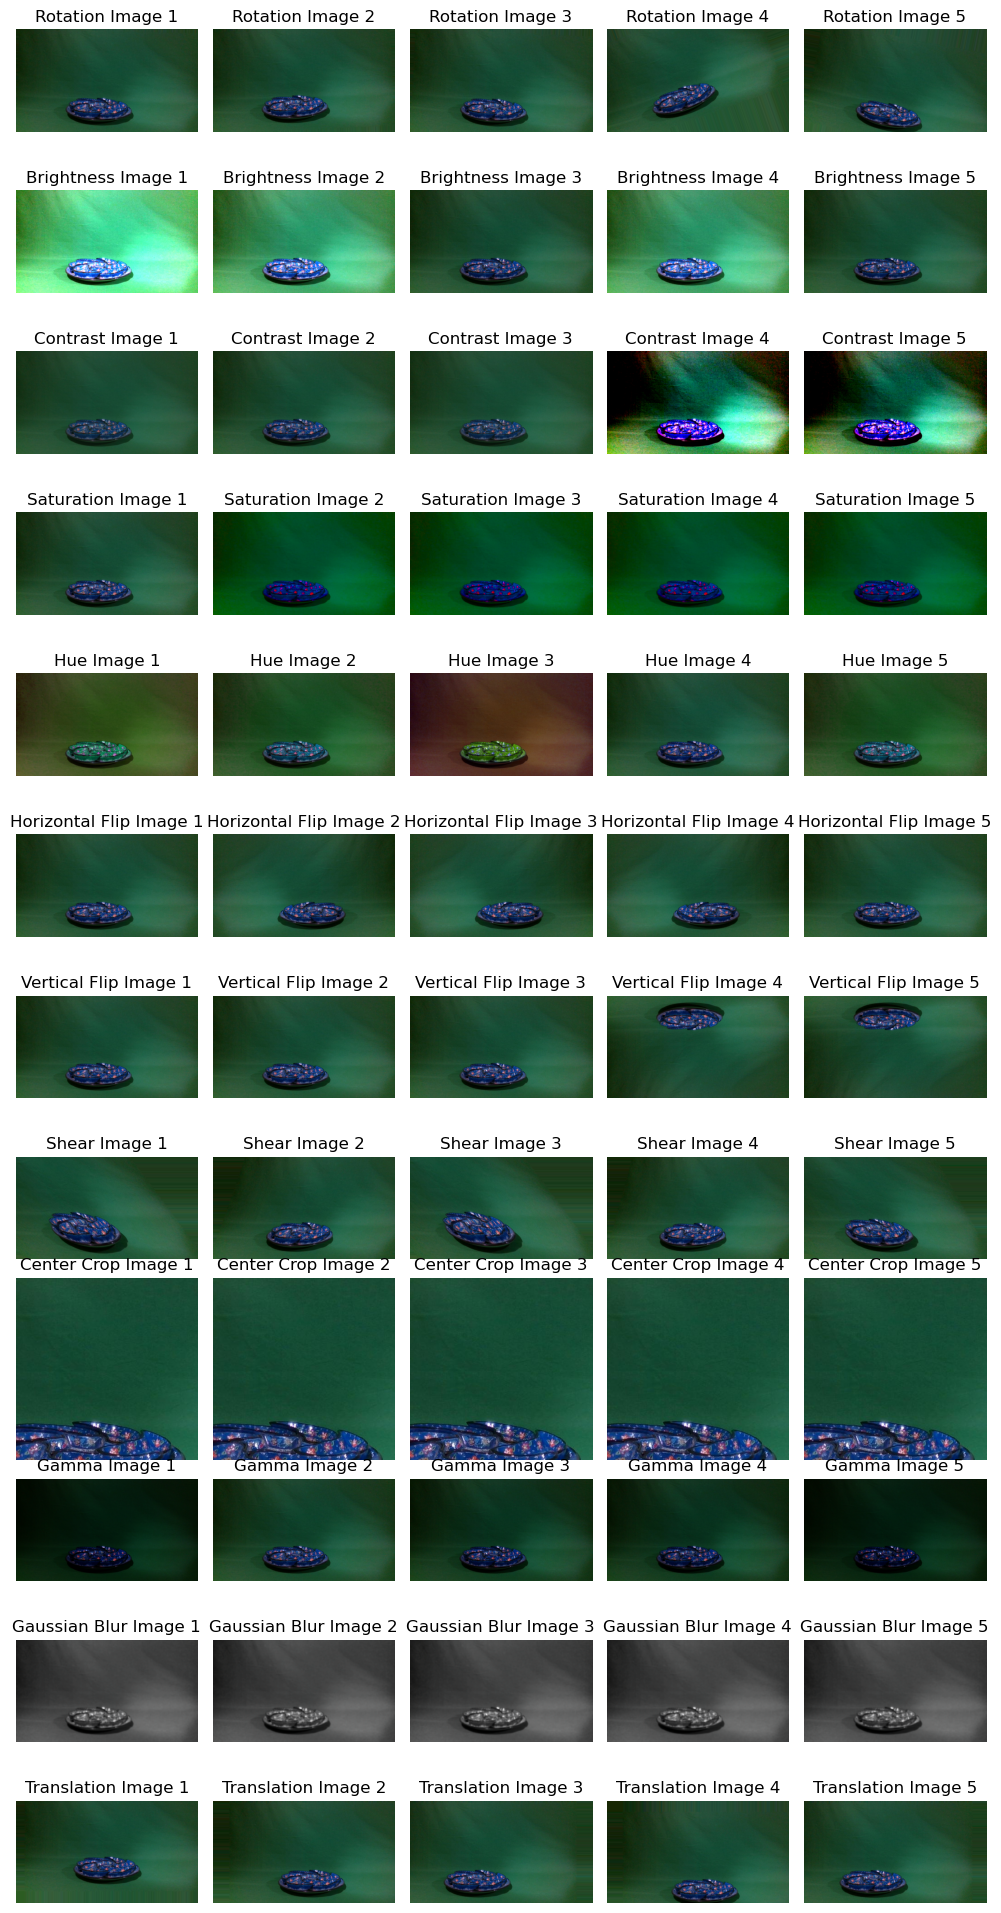

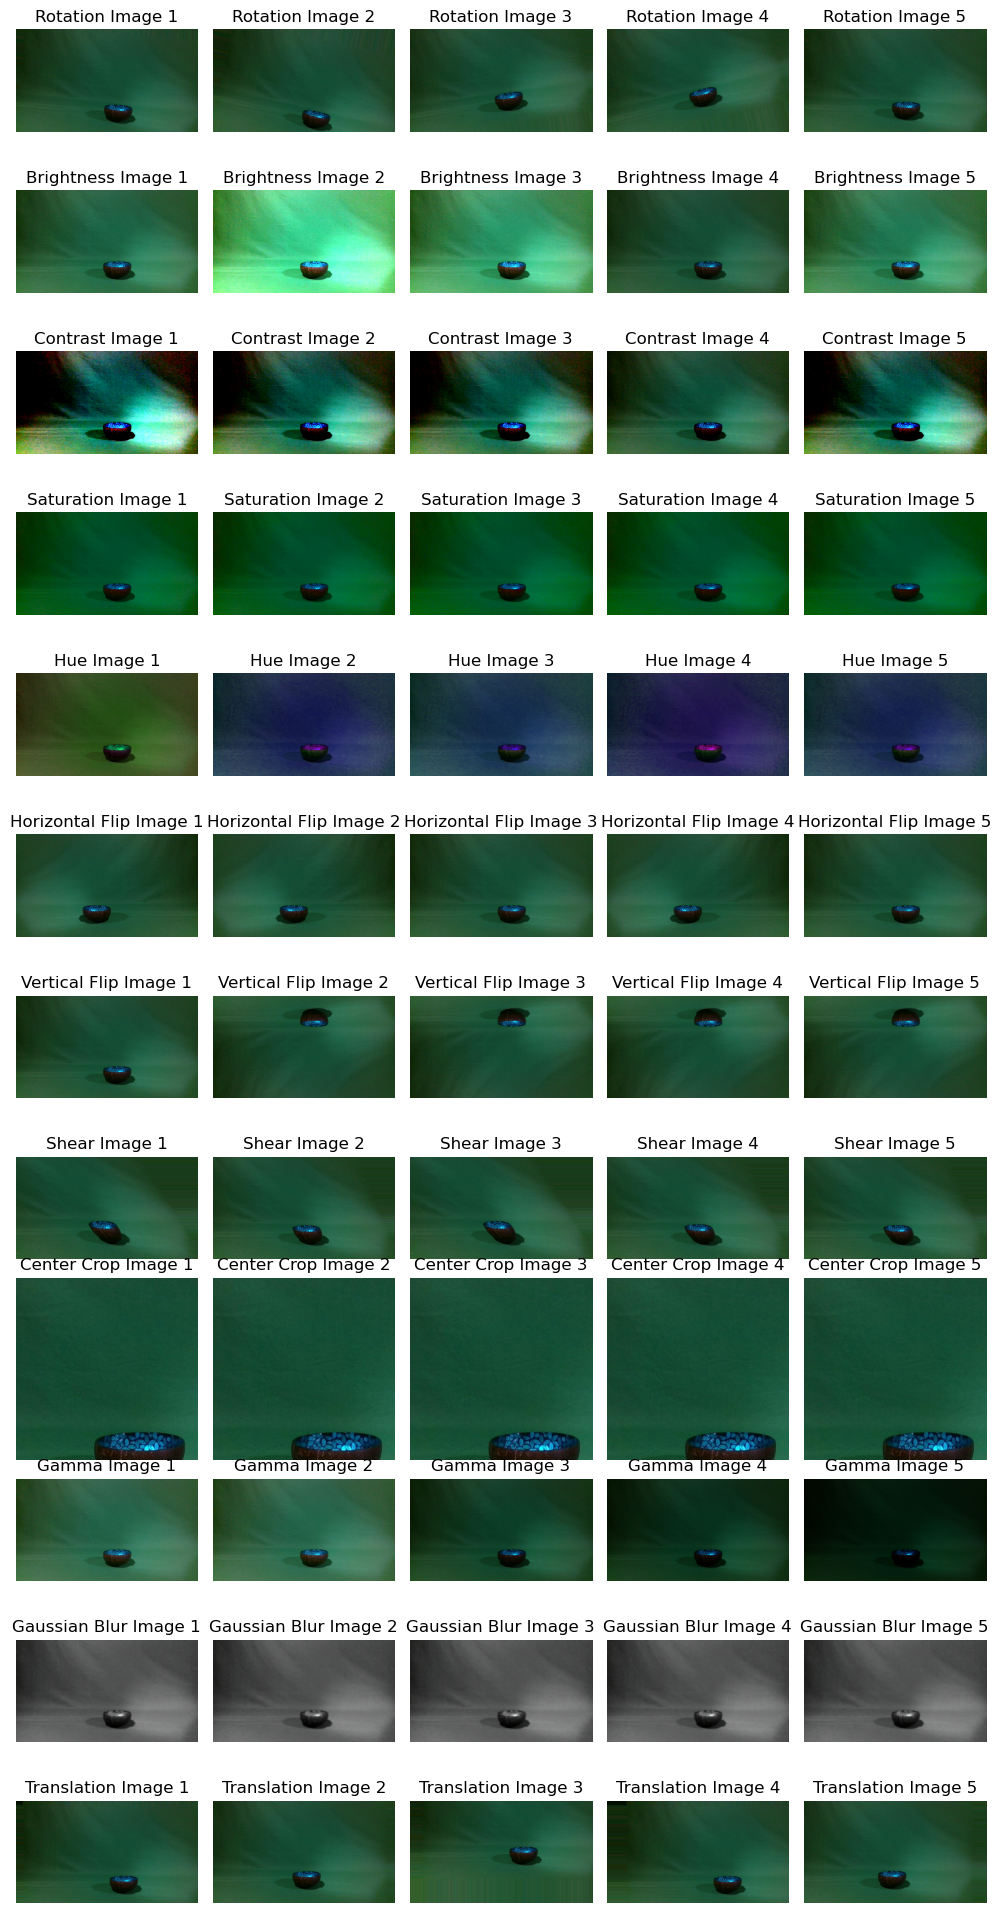

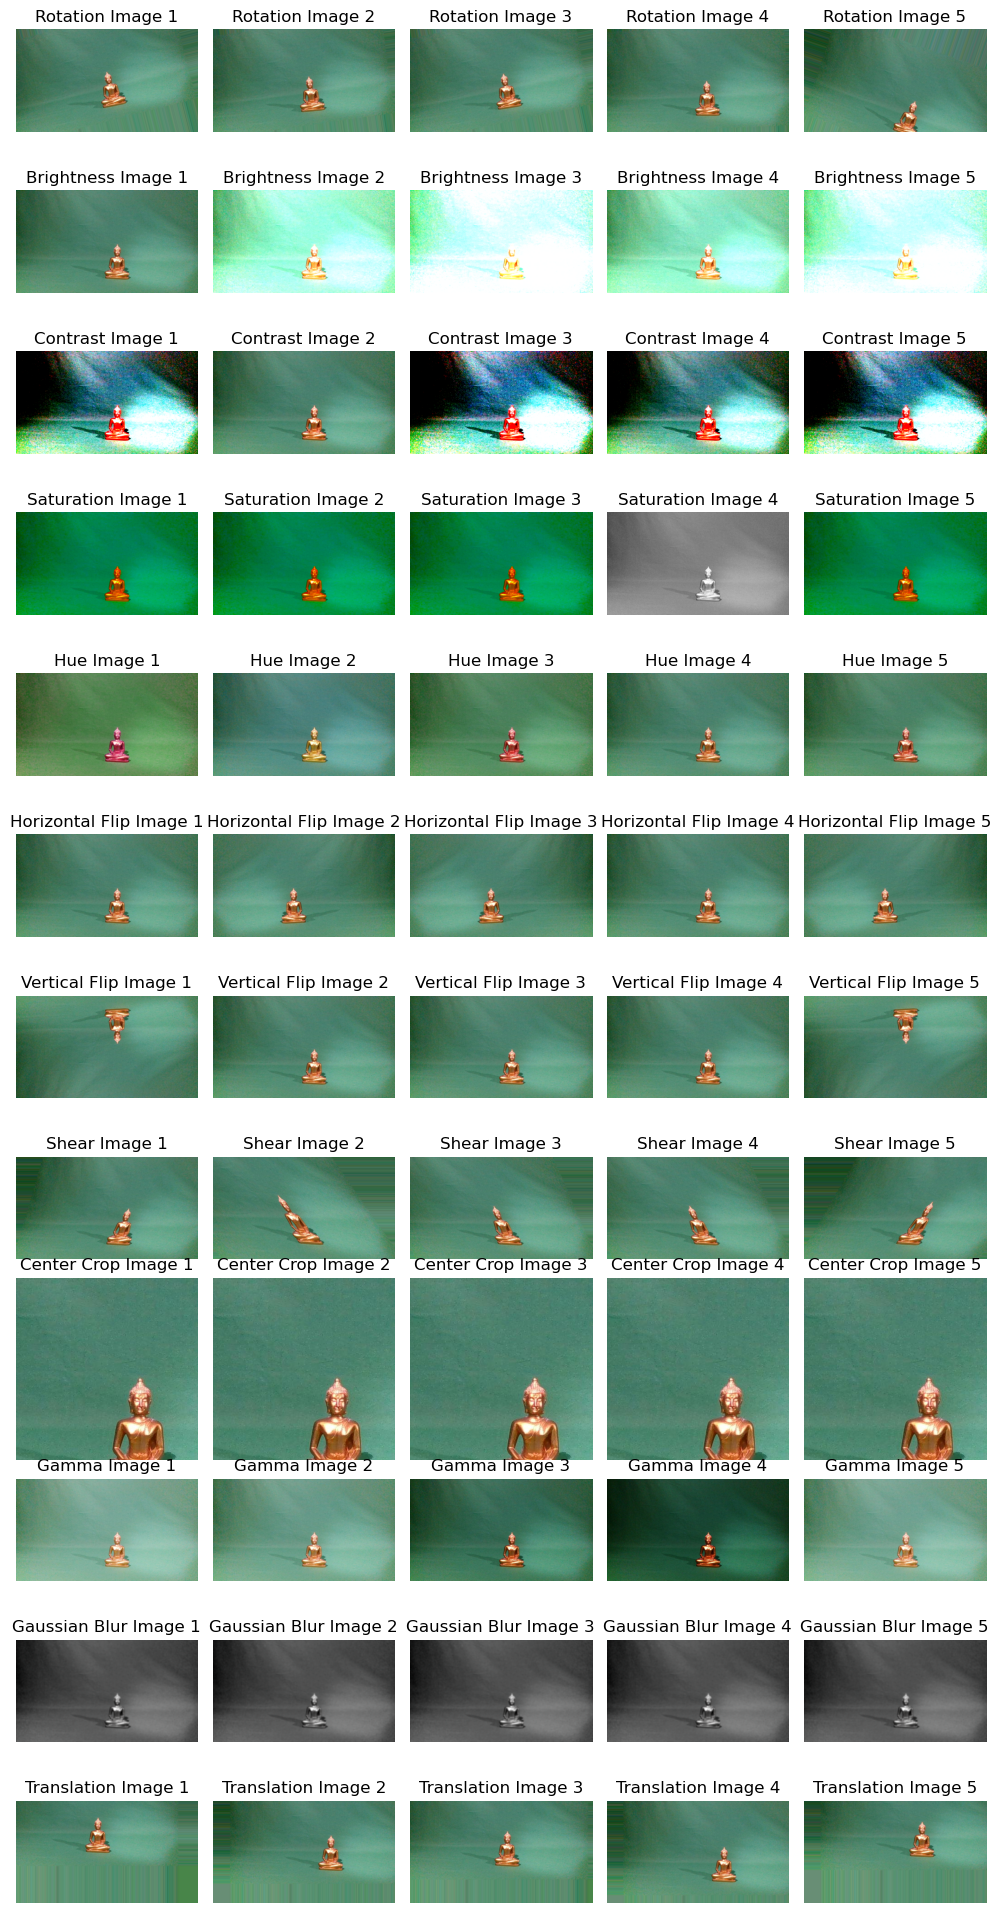

In [20]:
rows, cols = 12,5

#Looping through all the augmented images
for imgSet in AugmentedImgs:
    fig, ax = plt.subplots(12, 5, figsize=(10,20))
    row = 0
    for key in imgSet:
        for cnt in range(5):
            col = cnt % 5
            
            #Setting the image
            ax[row][col].imshow(imgSet[key][cnt][0])
            
            #Setting the title
            ax[row][col].set_title(imgSet[key][cnt][1]+" "+str(cnt+1)) 
            
            #Removing the axes
            ax[row][col].axis('off') 
            fig.tight_layout()
        row += 1 

**SaveImages** - This function saves the passed list of images to the specified directory 

In [26]:
def SaveImages(listOfImages, directory):
    if not os.path.exists(directory):
       # Create a new directory if it does not exist
       os.makedirs(directory)
    
    count = 1
    for imgSet in listOfImages:
        
        for key in imgSet:
            if not os.path.exists(directory+key+"/"):
               # Create a new directory if it does not exist
               os.makedirs(directory+key+"/")
            
            for x in range(5):
                #Saving the images
                tf.keras.utils.save_img(directory+key+"/Item_"+str(count)+"_"+imgSet[key][x][1]+"_"+str(x+1)+".jpeg",imgSet[key][x][0], None, 'JPEG', True)
        count += 1

In [27]:
SaveImages(AugmentedImgs, "./images/AugmentedImagesTensorFlow/")